In [20]:
##################################################
# Introduction to Text Mining and Natural Language Processing
##################################################

##################################################
# Sentiment Analysis and Sentiment Modeling for Amazon Reviews
##################################################

# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

# !pip install nltk
# !pip install textblob
# !pip install wordcloud

In [21]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [22]:
##################################################
# 1. Text Preprocessing
##################################################

amazon_reviews = pd.read_csv("amazon_reviews.csv")
df = amazon_reviews.copy()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [23]:
###############################
# Normalizing Case Folding
###############################

df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


In [24]:
###############################
# Punctuations
###############################

df['reviewText'] = df['reviewText'].str.replace("[^\w\s]", " ", regex=True)
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adv...
2,it works as expected i should have sprung for...
3,this think has worked out great had a diff br...
4,bought it with retail packaging arrived legit...
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it ...
4913,good amount of space for the stuff i want to d...


In [25]:
###############################
# Numbers
###############################

df['reviewText'] = df['reviewText'].str.replace("\d", " ", regex=True)
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adv...
2,it works as expected i should have sprung for...
3,this think has worked out great had a diff br...
4,bought it with retail packaging arrived legit...
...,...
4910,i bought this sandisk gb class to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it ...
4913,good amount of space for the stuff i want to d...


In [26]:
###############################
# Stopwords
###############################

import nltk
nltk.download('stopwords')

sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected sprung higher capacity think ma...
3,think worked great diff bran gb card went sout...
4,bought retail packaging arrived legit orange e...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


In [27]:
###############################
# Rarewords
###############################

temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
drops = temp_df[temp_df <= 1]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected higher capacity think made bit ...
3,think worked great gb card went south months o...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used capabilities samsung galaxy note greatly ...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


In [28]:
###############################
# Tokenization
###############################

nltk.download("punkt")

df["reviewText"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, great, gb, card, went, south, ..."
4,"[bought, retail, packaging, arrived, legit, en..."


In [29]:
###############################
# Lemmatization
###############################

nltk.download('wordnet')

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewText
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked great gb card went south month on...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used capability samsung galaxy note greatly ex...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


In [30]:
##################################################
# 2. Text Visualization
##################################################

In [31]:
###############################
# Terim Frekanslarının Hesaplanması
###############################

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
27,card,5659.00
14,work,2081.00
7,phone,1977.00
40,gb,1795.00
41,great,1481.00
...,...,...
2720,wall,2.00
2721,chart,2.00
2729,mile,2.00
3574,chkdsk,2.00


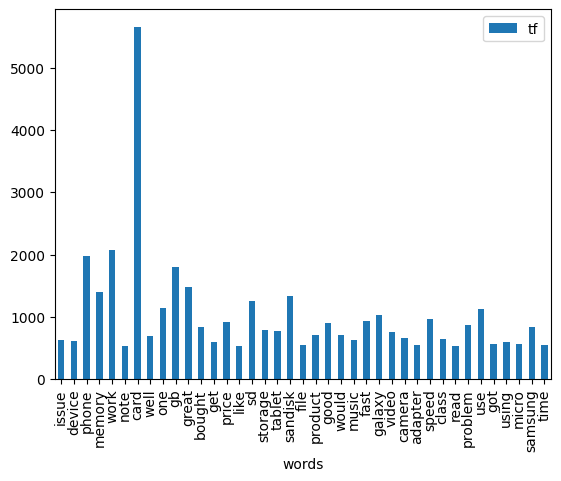

In [32]:
###############################
# Barplot
###############################

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

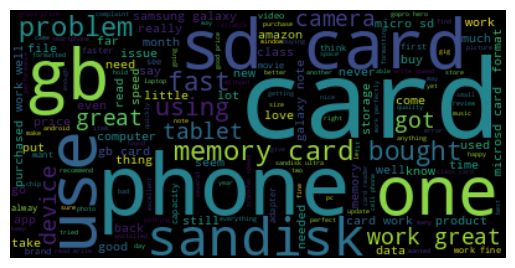

In [33]:
###############################
# Wordcloud
###############################

text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

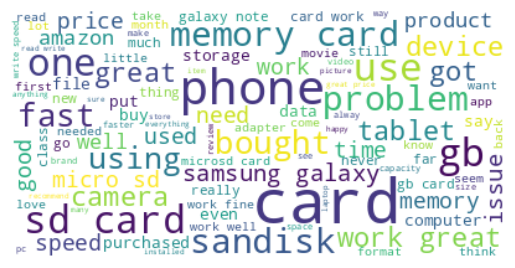

In [34]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

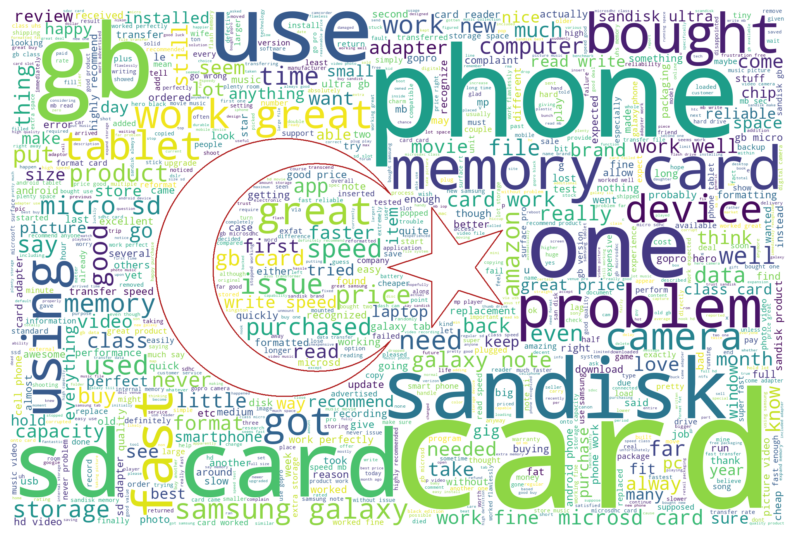

In [35]:
###############################
# Şablonlara Göre Wordcloud
###############################

tr_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
##################################################
# 3. Sentiment Analysis
##################################################

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [37]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [38]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
3,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp..."
4,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co..."
7,"{'neg': 0.097, 'neu': 0.663, 'pos': 0.24, 'com..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp..."


In [39]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,reviewText
0,0.00
1,0.00
2,0.40
3,0.92
4,0.86
5,0.00
6,0.87
7,0.74
8,0.00
9,0.92


In [40]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [41]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great gb card went south month on...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.92
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


In [42]:
###############################
# 4. Feature Engineering
###############################

df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

,reviewText
0,neg
1,neg
2,pos
3,pos
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [43]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great gb card went south month on...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.92,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [44]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,3939
neg,976


In [45]:
df.groupby("sentiment_label")["overall"].mean()

,overall
sentiment_label,
neg,4.09
pos,4.71


In [46]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df["sentiment_label"]

,sentiment_label
0,0
1,0
2,1
3,1
4,1
...,...
4910,1
4911,1
4912,1
4913,1


In [47]:
y = df["sentiment_label"]
X = df["reviewText"]

In [48]:
###############################
# Count Vectors
###############################

# Count Vectors: frekans temsiller
# TF-IDF Vectors: normalize edilmiş frekans temsiller
# Word Embeddings (Word2Vec, GloVe, BERT vs)


# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin numerik temsilleri

# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [50]:
# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [51]:
# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [52]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
###############################
# TF-IDF
###############################

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)


tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [54]:
###############################
# 5. Sentiment Modeling
###############################

# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

In [55]:
###############################
# Logistic Regression
###############################

In [56]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8368260427263479

In [59]:
new_review = pd.Series("this product is great")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1])

In [60]:
new_review_2 = pd.Series("look at that shit very bad")
new_review_2 = TfidfVectorizer().fit(X).transform(new_review_2)
log_model.predict(new_review_2)

array([0])

In [61]:
new_review_3 = pd.Series("it was good but I am sure that it fits me")
new_review_3 = TfidfVectorizer().fit(X).transform(new_review_3)
log_model.predict(new_review_2)

array([0])

In [68]:
random_review = pd.Series(df["reviewText"].sample(1).values)
print(random_review)

new_review_4 = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review_4)

0    came adapter described work perfectly use sdhc...
dtype: object


array([1])

In [69]:
###############################
# Random Forests
###############################

In [70]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.846998982706002

In [71]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.832146490335707

In [74]:
###############################
# Hiperparametre Optimizasyonu
###############################

rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)


cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8142421159715157